In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as stats
from datetime import datetime,timedelta
from geopy.distance import great_circle
import geopandas as gpd

import climate_or_weather as cor

wr = cor.weatherRecord('New York Central Park','2019-07-21')

Error geocode - default to Denver


In [6]:
y = wr.Tmax_week.values


In [16]:
for i in range(10):
    print(i,((y*1)%10).astype(int).tolist().count(i))




0 124
1 127
2 125
3 101
4 50
5 85
6 110
7 118
8 156
9 61


(array([ 13.,  23.,  27.,  41.,  41.,  50.,  86.,  92., 134.,  97., 101.,
         89.,  89.,  64.,  35.,  29.,  15.,   8.,  11.,   5.,   2.]),
 array([20.        , 20.95238095, 21.9047619 , 22.85714286, 23.80952381,
        24.76190476, 25.71428571, 26.66666667, 27.61904762, 28.57142857,
        29.52380952, 30.47619048, 31.42857143, 32.38095238, 33.33333333,
        34.28571429, 35.23809524, 36.19047619, 37.14285714, 38.0952381 ,
        39.04761905, 40.        ]),
 <a list of 21 Patch objects>)

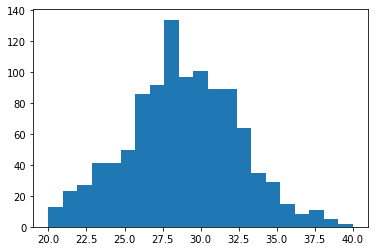

In [28]:
fig,ax = plt.subplots()
ax.hist(y+(np.random.rand(y.size)*1-1),bins=21,range=(20,40))


In [9]:
import geoplot

ModuleNotFoundError: No module named 'geoplot'

In [3]:
df_hcn = pd.read_pickle('data/df_hcn_stations.pkl')

In [7]:
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

In [24]:
import plotly.figure_factory as ff

import numpy as np
import pandas as pd

df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/laucnty16.csv')
df_sample['State FIPS Code'] = df_sample['State FIPS Code'].apply(lambda x: str(x).zfill(2))
df_sample['County FIPS Code'] = df_sample['County FIPS Code'].apply(lambda x: str(x).zfill(3))
df_sample['FIPS'] = df_sample['State FIPS Code'] + df_sample['County FIPS Code']

colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]
endpts = list(np.linspace(1, 12, len(colorscale) - 1))
fips = df_sample['FIPS'].tolist()
values = df_sample['Unemployment Rate (%)'].tolist()

fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='USA by Unemployment %',
    legend_title='% unemployed'
)

fig.layout.template = None
fig.show()

ValueError: 
The create_choropleth figure factory requires the plotly-geo package.
Install using pip with:

$ pip install plotly-geo

Or, install using conda with

$ conda install -c plotly plotly-geo


In [32]:
import plotly.figure_factory as ff

fips = ['06021', '06023', '06027',
        '06029', '06033', '06059',
        '06047', '06049', '06051',
        '06055', '06061']
values = range(len(fips))

fig = ff.create_choropleth(fips=fips, values=values)
fig.layout.template = None
fig.show()

ValueError: 
The create_choropleth figure factory requires the plotly-geo package.
Install using pip with:

$ pip install plotly-geo

Or, install using conda with

$ conda install -c plotly plotly-geo


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density
popdensity = {
'New Jersey':  438.00,
'Rhode Island':   387.35,
'Massachusetts':   312.68,
'Connecticut':    271.40,
'Maryland':   209.23,
'New York':    155.18,
'Delaware':    154.87,
'Florida':     114.43,
'Ohio':  107.05,
'Pennsylvania':  105.80,
'Illinois':    86.27,
'California':  83.85,
'Hawaii':  72.83,
'Virginia':    69.03,
'Michigan':    67.55,
'Indiana':    65.46,
'North Carolina':  63.80,
'Georgia':     54.59,
'Tennessee':   53.29,
'New Hampshire':   53.20,
'South Carolina':  51.45,
'Louisiana':   39.61,
'Kentucky':   39.28,
'Wisconsin':  38.13,
'Washington':  34.20,
'Alabama':     33.84,
'Missouri':    31.36,
'Texas':   30.75,
'West Virginia':   29.00,
'Vermont':     25.41,
'Minnesota':  23.86,
'Mississippi':   23.42,
'Iowa':  20.22,
'Arkansas':    19.82,
'Oklahoma':    19.40,
'Arizona':     17.43,
'Colorado':    16.01,
'Maine':  15.95,
'Oregon':  13.76,
'Kansas':  12.69,
'Utah':  10.50,
'Nebraska':    8.60,
'Nevada':  7.03,
'Idaho':   6.04,
'New Mexico':  5.79,
'South Dakota':  3.84,
'North Dakota':  3.59,
'Montana':     2.39,
'Wyoming':      1.96,
'Alaska':     0.42}
# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 450 # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = popdensity[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('Filling State Polygons by Population Density')
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [3]:
import geopandas as gpd

contiguous_usa = gpd.read_file('data/cb_2018_us_state_20m.shp')

DriverError: data/cb_2018_us_state_20m.shp: No such file or directory

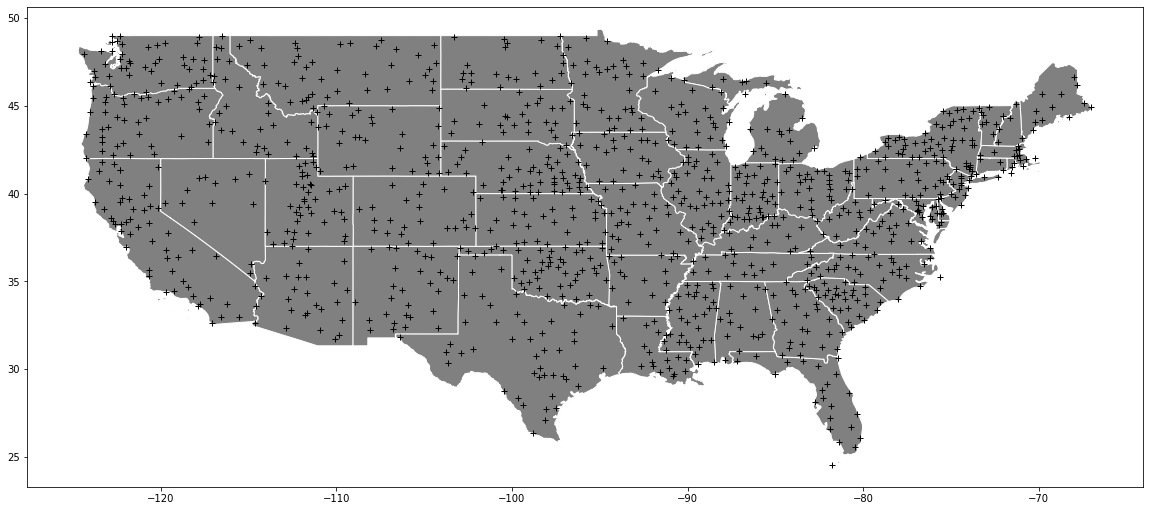

In [41]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(20,20))
country = gpd.read_file("data/gz_2010_us_040_00_5m.json")
country[country['NAME'].isin(['Alaska','Hawaii','Puerto Rico']) == False].plot(ax=ax,color='gray',edgecolor='white');

df_hcn = pd.read_pickle('data/df_hcn_stations.pkl')
ax.plot(df_hcn['LONGITUDE'],df_hcn['LATITUDE'],marker='+',linestyle='',color='k')